                                                 LAPTOP PRICE ANALYSIS

Reading Data and Basic Stats

In [15]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from ydata_profiling import ProfileReport
import ydata_profiling
import statsmodels.api as sm

In [4]:
# Example of loading a dataset
df = pd.read_csv('laptop.csv')

In [5]:
# Check the first few rows of the dataset
df.head()

Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageType  SecondaryStorageType  \
0            128                 0                SSD                    No   
1            128                 0      Flash Storage                    No   
2            256                 0                SSD                    No   
3            512                 0                SSD                    No   
4            256                 0                SSD                    No   

   GPU_company               GPU_model  
0        Intel  Iris Plus Graphics 640  
1        Intel        HD Graphics 6000  
2        Intel         HD Graphics 620  
3          AMD          Radeon Pro 455  
4        Intel  Iris Plus Graphics 650  

[5 rows x 23 columns]

Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [7]:
# InformationRelatedtoData
df.shape

(1275, 23)

In [9]:
# Check for missing values
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [10]:
# Fill missing values if any (for simplicity, you can drop missing values)
df = df.dropna()

In [11]:
df.describe()

Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.000000          0.000000  
25%    1080.000000     2.000000      256.000000          0.000000  
50%    1080.000000     2.500000      256.000000          0.000000  
75%    1080.000000     2.700000      512.000000          0.000000  
max    2160.000000     3.600000     2048.000000       2048.000000

Data Visualisation

<Axes: xlabel='Company'>

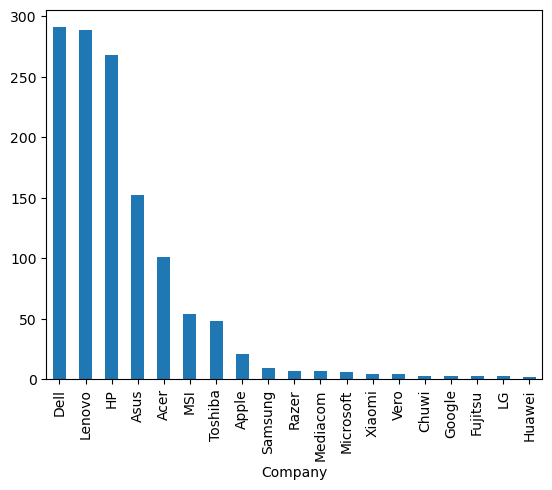

In [543]:
# ploting bar graph for company
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='OS'>

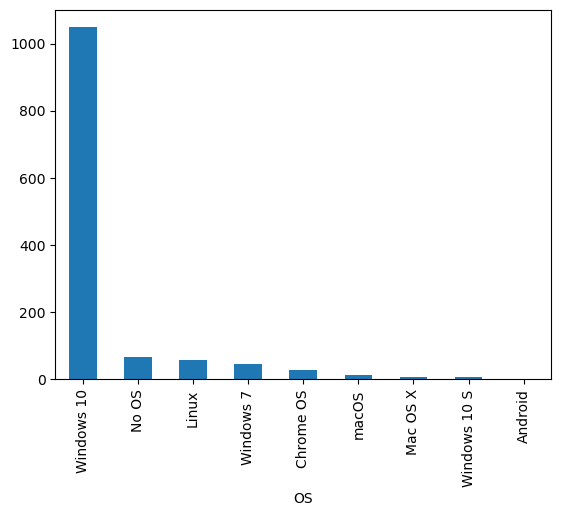

In [544]:
# ploting bar graph for OS
df['OS'].value_counts().plot(kind = 'bar' , x = df['OS'])

<Axes: title={'center': 'TouchScreen'}, ylabel='count'>

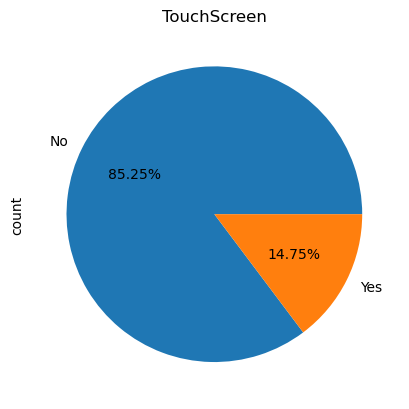

In [545]:
# ploting pie chart for Touchscreen
df['Touchscreen'].value_counts().plot(kind = 'pie', autopct = '%.2f%%' , title = 'TouchScreen')

<Axes: xlabel='Ram'>

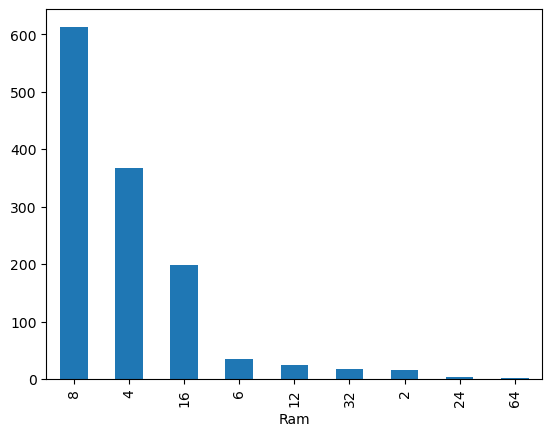

In [547]:
# ploting bar graph for Ram
df['Ram'].value_counts().plot(kind = 'bar')

<Axes: title={'center': 'CPU_Company'}, ylabel='count'>

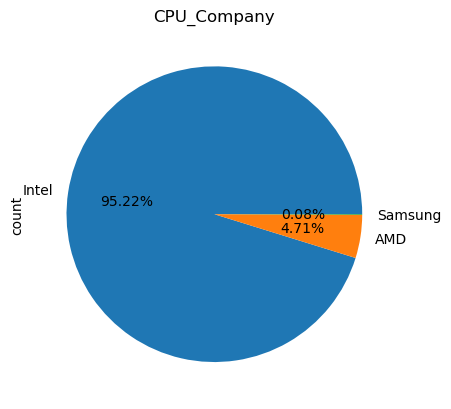

In [549]:
# ploting pie chart for CPU Company
df['CPU_company'].value_counts().plot(kind = 'pie' , autopct = '%.2f%%', title = 'CPU_Company')

<Axes: title={'center': 'GPU_Company'}, ylabel='count'>

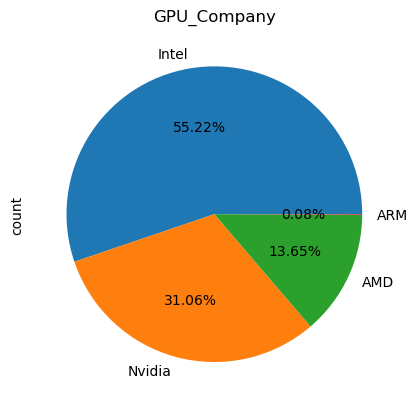

In [551]:
# ploting pie chart for GPU_Company
df['GPU_company'].value_counts().plot(kind = 'pie' , autopct = '%.2f%%', title = 'GPU_Company')

<Axes: ylabel='count'>

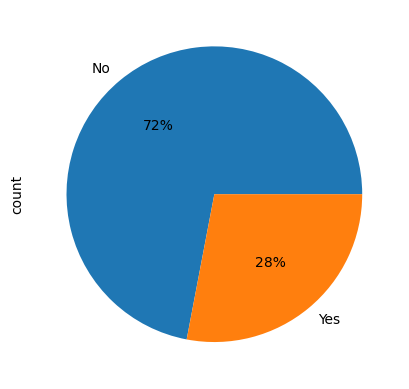

In [553]:
# ploting pie chart for IPSpanel
df['IPSpanel'].value_counts().plot(kind = 'pie' , autopct = '%.f%%')

<Axes: xlabel='Inches'>

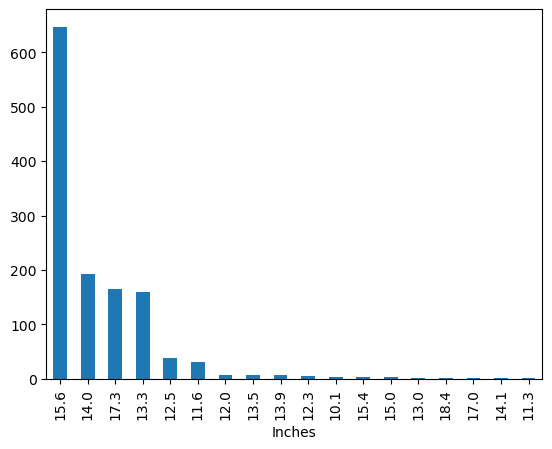

In [555]:
# ploting pie chart for Inches
df['Inches'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

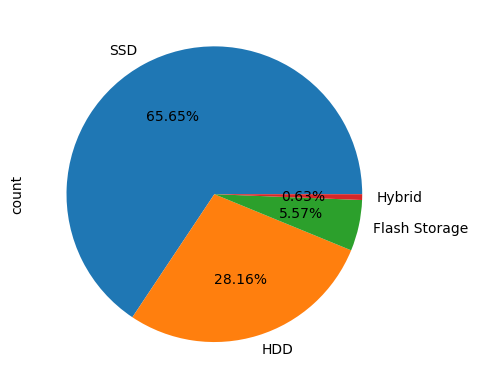

In [556]:
# ploting pie chart PrimaryStorageType
df['PrimaryStorageType'].value_counts().plot(kind = 'pie' , autopct = '%.2f%%')

<Axes: xlabel='Screen'>

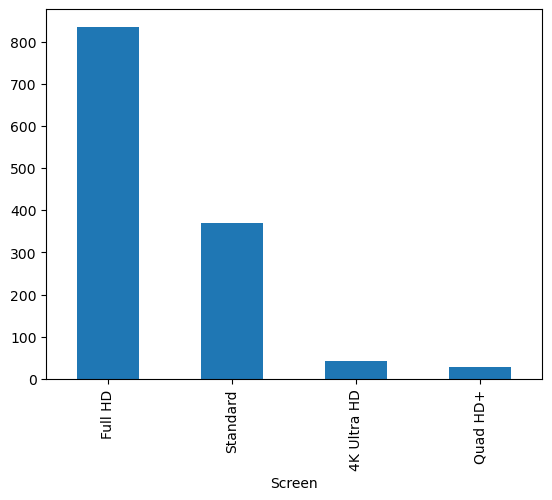

In [559]:
# ploting bar graph for Screen
df['Screen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='SecondaryStorageType'>

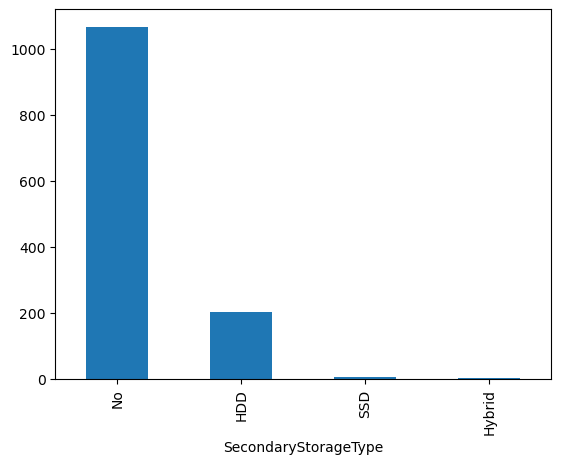

In [560]:
# ploting bar graph for SecondaryStorageType
df['SecondaryStorageType'].value_counts().plot(kind = 'bar')

C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


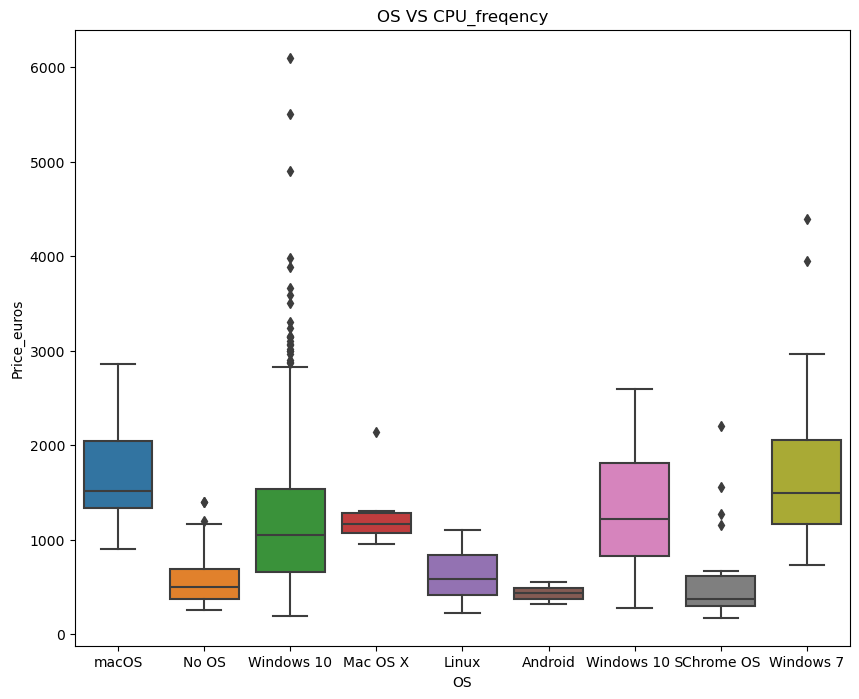

In [561]:
# ploting box plot for OS VS CPU_Frequency
plt.figure(figsize = (10,8))
sns.boxplot(x = df['OS'], y= df['Price_euros'])
plt.title('OS VS CPU_freqency')
plt.show()

C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

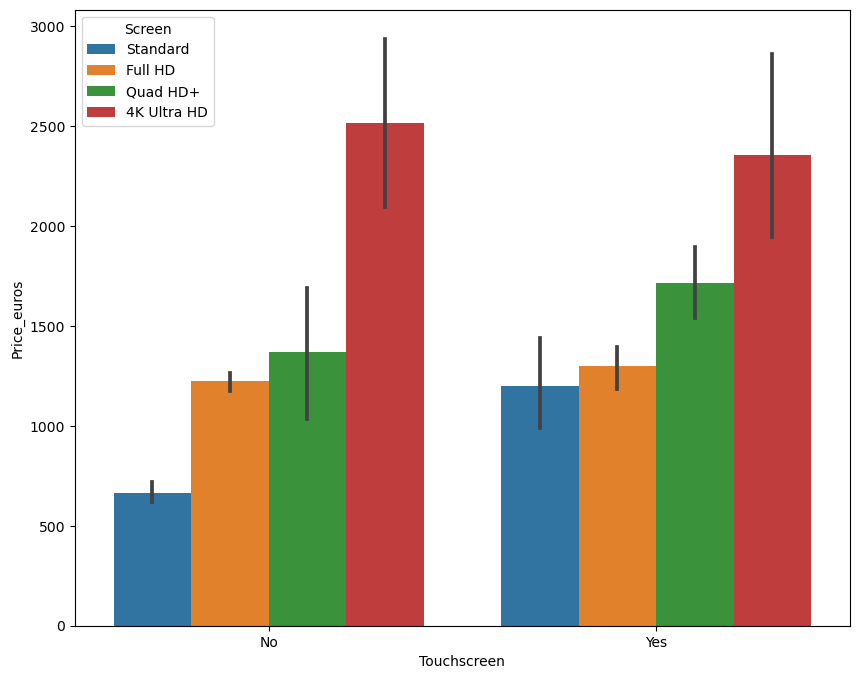

In [563]:
# ploting barplot
plt.figure(figsize = (10,8))
sns.barplot(x = df['Touchscreen'], y= df['Price_euros'] , hue = df['Screen'])
plt.show()

C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

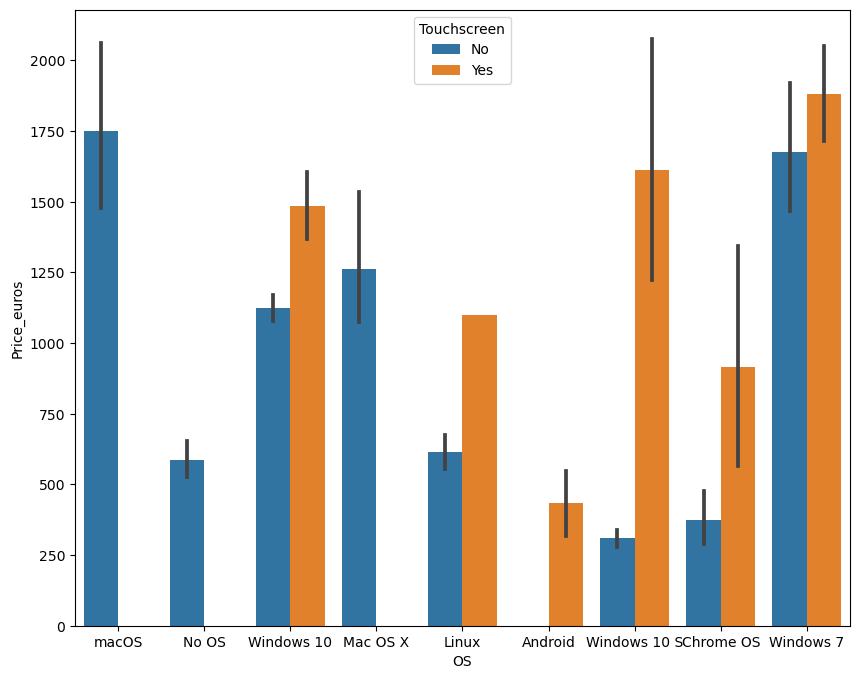

In [565]:
# ploting barplot
plt.figure(figsize = (10,8))
sns.barplot(x = df['OS'], y= df['Price_euros'] , hue = df['Touchscreen'])
plt.show()

<Axes: xlabel='PrimaryStorage', ylabel='Price_euros'>

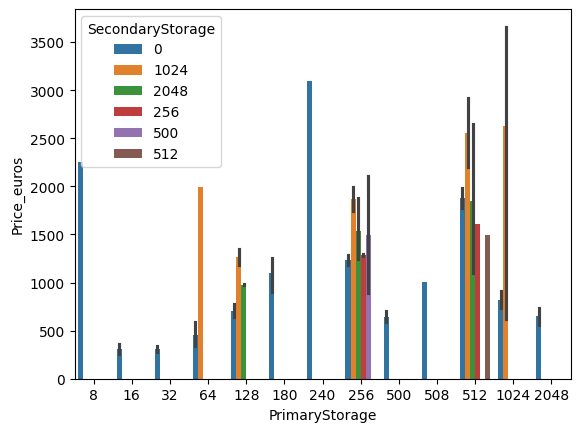

In [29]:
# ploting barplot
sns.barplot(
    x=df['PrimaryStorage'],
    y=df['Price_euros'],
    hue=df['SecondaryStorage'].astype(str)  
)

<Axes: xlabel='RetinaDisplay', ylabel='Price_euros'>

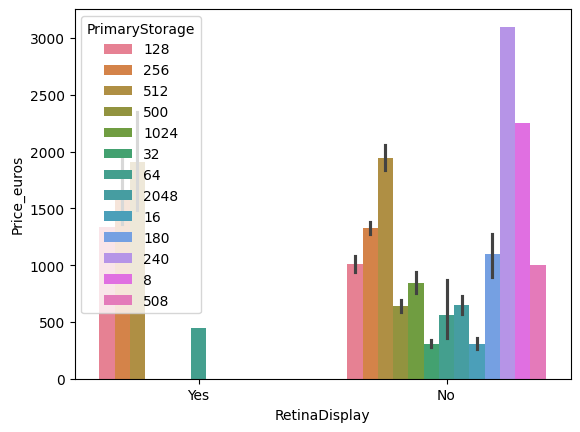

In [30]:
# ploting barplot
sns.barplot(
    x=df['RetinaDisplay'],
    y=df['Price_euros'],
    hue=df['PrimaryStorage'].astype(str)
)

C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='CPU_freq', ylabel='Ram'>

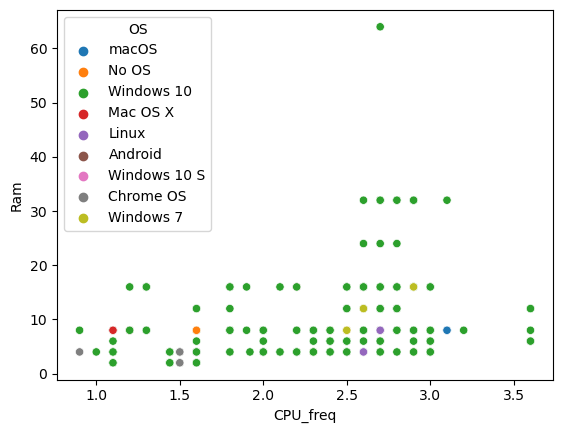

In [591]:
# ploting scatterplot
sns.scatterplot(data = df , x= df['CPU_freq'], y = df['Ram'], hue = df['OS'])

C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pushy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='CPU_freq', ylabel='Ram'>

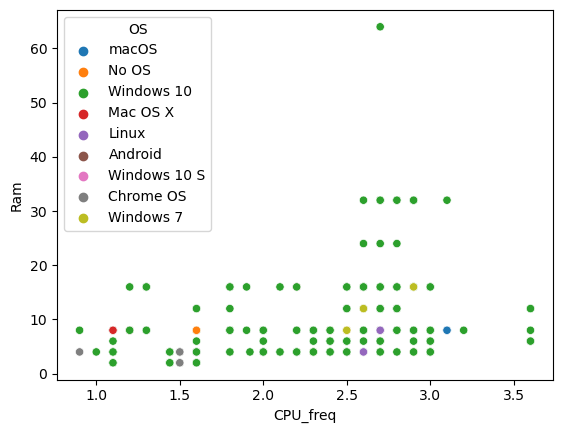

In [593]:
# ploting scatterplot
sns.scatterplot(data = df , x= df['CPU_freq'], y = df['Ram'], hue = df['OS'])

Regression Analysis

In [627]:
# Replacing 0, 1 to No, Yes
df['Touchscreen'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df['IPSpanel'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df['RetinaDisplay'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)                       

In [13]:
X = df[['Price_euros']]  # Replace with your actual predictor columns
y = df['Price_euros']  # Replace with your actual target variable

In [16]:
# Add constant for intercept
X = sm.add_constant(X)

In [18]:
# Fit the model
model = sm.OLS(y, X).fit()

In [19]:
# Summary of regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.354e+34
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:33:55   Log-Likelihood:                 35382.
No. Observations:                1275   AIC:                        -7.076e+04
Df Residuals:                    1273   BIC:                        -7.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.99e-13   1.15e-14     17.360      

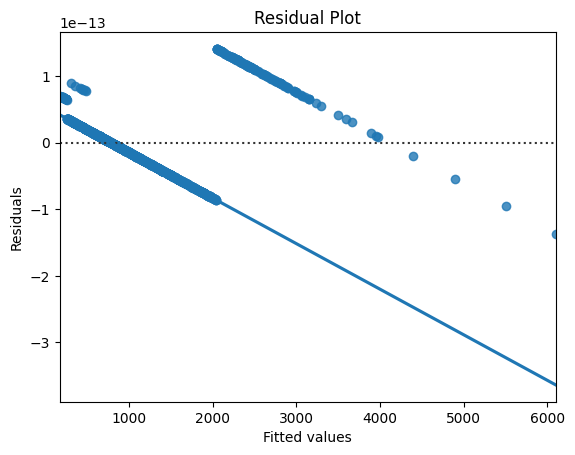

In [20]:
# Visualize residuals
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [21]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Add constant to both training and testing sets
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [23]:
# Fit model on training data
model = sm.OLS(y_train, X_train_const).fit()

In [24]:
# Predict on test set
y_pred = model.predict(X_test_const)

In [31]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.0856913116762923e-26


In [25]:
# Evaluate predictions (e.g., using R²)
from sklearn.metrics import r2_score
print("Test R²:", r2_score(y_test, y_pred))

Test R²: 1.0


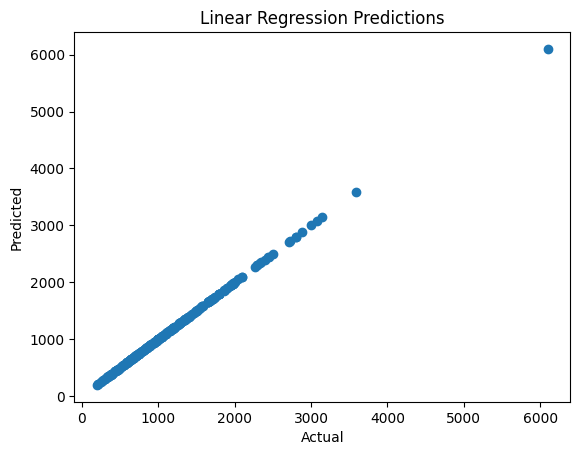

In [32]:
# ploting scatterplot for Linear Regression Predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression Predictions")
plt.show()

Summary

In [26]:
# Generating summary report
profile= ProfileReport(df, title='Laptop Sales')

In [27]:
# Summary Report
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/23 [00:00<?, ?it/s]
%|▍         | 1/23 [00:00<00:05,  3.91it/s]
100%|██████████| 23/23 [00:00<00:00, 61.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]